In [6]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [7]:
data_pre=pd.read_csv("preprocessing.csv")
data_pre.head(10)

,Gender,Occupation,Channel_Code,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead,Age_Group,Vintage_Group
0,0,1,2,1,0.099205,0,0,78,24
1,0,2,0,1,0.054321,0,0,34,24
2,0,3,2,1,0.141660,1,0,56,24
3,1,2,0,1,0.043525,0,0,34,2
4,0,2,0,1,0.083823,0,0,34,24
5,1,3,0,1,0.050659,1,0,56,24
6,1,1,2,2,0.100275,1,1,67,2
7,0,3,2,1,0.041034,1,0,45,2
8,0,3,1,1,0.121331,0,0,45,24
9,0,3,1,0,0.192954,0,0,56,46


## Pre-precessing

In [8]:
#droping target-variable for the pre
X=data_pre.drop('Is_Lead', axis=1)
Y=data_pre['Is_Lead']

# Splitting to Training and Test
from sklearn.model_selection import train_test_split
train_x, test_x , train_y, test_y = train_test_split(X, Y, train_size=0.55, test_size = 0.45)

train_x.shape, test_x.shape, train_y.shape, test_y.shape

((135148, 8), (110577, 8), (135148,), (110577,))

## Training Model and data validation

##### K Nearesr Neighbour

In [9]:
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.metrics import roc_auc_score

from sklearn.model_selection import cross_val_score

# Automating the process of cross validation for different K-Neighbors
def Val_score(n_neighbors):
  '''
  takes range of n_neighbors as input
  returns Mean and Standard Deviation for each value of n_neighbors
  '''
  avg = []
  std = []
  
  for i in n_neighbors:
    
    # 10 fold cross validation for every value of n_neighbor
    score = cross_val_score( KNN(n_neighbors = i) , X = train_x, y = train_y, cv = 10)
    
    # adding mean to avg list
    avg.append(score.mean())
    
    # adding standard deviation to std list
    std.append(score.std())
    
    print("Score for K="+str(i)+" is "+str(score.mean()))
    
  return avg, std

In [10]:
# Using this function  
n_neighbors = range(10,50,10)
mean, std = Val_score(n_neighbors)

Score for K=10 is 0.8495057081977604
Score for K=20 is 0.8496166888713427
Score for K=30 is 0.8481368231823936
Score for K=40 is 0.8473747037300516


Text(0.5, 1.0, 'Mean Validation score')

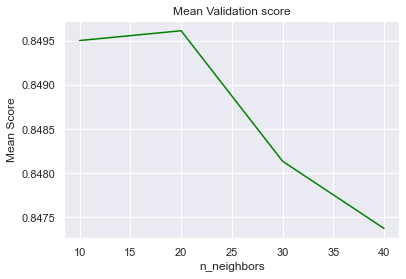

In [11]:
# Ploting Mean Validation Score for each K value
plt.plot(n_neighbors[:], mean[:], color = 'green', label = 'mean' )
plt.xlabel('n_neighbors')
plt.ylabel('Mean Score')
plt.title('Mean Validation score')

In [12]:
# Need to rerun the same Using this function----but lowering the range as score decreases after 20
n_neighbors = range(1,25)
mean, std = Val_score(n_neighbors)

Score for K=1 is 0.79054813218733
Score for K=2 is 0.8261683418316659
Score for K=3 is 0.8324872850785289
Score for K=4 is 0.8412332878398917
Score for K=5 is 0.8433272804990711
Score for K=6 is 0.8471749284432345
Score for K=7 is 0.8473450998679327
Score for K=8 is 0.8499792676054116
Score for K=9 is 0.8489063609840273
Score for K=10 is 0.8495057081977604
Score for K=11 is 0.8495648967587963
Score for K=12 is 0.8498460740429993
Score for K=13 is 0.8497276613321241
Score for K=14 is 0.8498312619828188
Score for K=15 is 0.849683276618468
Score for K=16 is 0.8495056895820785
Score for K=17 is 0.8496240847723119
Score for K=18 is 0.8499052587713946
Score for K=19 is 0.8496536842542703
Score for K=20 is 0.8496166888713427
Score for K=21 is 0.8498164827738417
Score for K=22 is 0.8494539023972125
Score for K=23 is 0.8494983101067112
Score for K=24 is 0.8490099506843206


Text(0.5, 1.0, 'Mean Validation score')

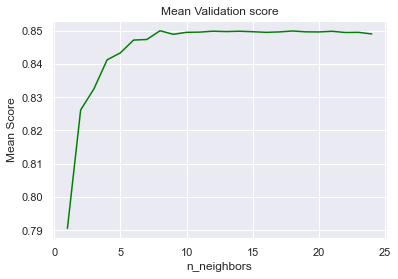

In [13]:
# Ploting Mean Validation Score for each K value
plt.plot(n_neighbors[:], mean[:], color = 'green', label = 'mean' )
plt.xlabel('n_neighbors')
plt.ylabel('Mean Score')
plt.title('Mean Validation score')

#### It seems 8 is the value, where max-score is first reached

In [14]:
model=KNN(n_neighbors = 8)
model.fit(train_x,train_y)
pred_prob=model.predict_proba(train_x)
auc_score=roc_auc_score(train_y, pred_prob[:,1])
print("KNN Train = " + str(auc_score))
pred_prob=model.predict_proba(test_x)
auc_score=roc_auc_score(test_y, pred_prob[:,1])
print("KNN test = " + str(auc_score))

KNN Train = 0.9178242473915785
KNN test = 0.8359594475197085


## Test Prediction

In [15]:
test=pd.read_csv("test.csv")
test.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
0,VBENBARO,Male,29,RG254,Other,X1,25,Yes,742366,No
1,CCMEWNKY,Male,43,RG268,Other,X2,49,NaN,925537,No
2,VK3KGA9M,Male,31,RG270,Salaried,X1,14,No,215949,No
3,TT8RPZVC,Male,29,RG272,Other,X1,33,No,868070,No
4,SHQZEYTZ,Female,29,RG270,Other,X1,19,No,657087,No


In [16]:
## Age
test=test.assign(Age_Group = test['Age'].apply(lambda x : 23 if (x>=20 and x<30)
                                               else (34 if (x>=30 and x<40)
                                                     else (45 if (x>=40 and x<50)
                                                           else (56 if (x>=50 and x<60)
                                                                 else (67 if (x>=60 and x<70)
                                                                       else (78 if (x>=70 and x<80)
                                                                             else 80)))))))
# Fill Credit_Product
test['Credit_Product']=test['Credit_Product'].fillna('0')

## Vintage
test=test.assign(Vintage_Group = test['Vintage'].apply(lambda x : 2 if (x>=0 and x<24)
                                               else (24 if (x>=24 and x<48)
                                                     else (46 if (x>=48 and x<72)
                                                           else (68 if (x>=72 and x<96)
                                                                 else (81 if (x>=96 and x<120)
                                                                       else 99))))))

test=test.drop(['Age','Vintage'], axis=1)
test['Gender'].replace({'Male':1, 'Female':0}, inplace=True)
test['Occupation'].replace({'Entrepreneur':0, 'Other':1, 'Salaried':2, 'Self_Employed':3}, inplace=True)
test['Channel_Code'].replace({'X1':0, 'X2':1, 'X3':2, 'X4':3}, inplace=True)
test['Is_Active'].replace({'Yes':1, 'No':0}, inplace=True)
test['Credit_Product'].replace({'Yes':0,'No':1,'0':2},inplace=True)
test.head()

,ID,Gender,Region_Code,Occupation,Channel_Code,Credit_Product,Avg_Account_Balance,Is_Active,Age_Group,Vintage_Group
0,VBENBARO,1,RG254,1,0,0,742366,0,23,24
1,CCMEWNKY,1,RG268,1,1,2,925537,0,45,46
2,VK3KGA9M,1,RG270,2,0,1,215949,0,34,2
3,TT8RPZVC,1,RG272,1,0,1,868070,0,23,24
4,SHQZEYTZ,0,RG270,1,0,1,657087,0,23,2


In [17]:
#Removing ID and region
test_tst=test.drop(['ID','Region_Code'], axis=1)


#scaling Avg_Account_Balance with Standard-Deviation
from sklearn.preprocessing import MinMaxScaler
ss = MinMaxScaler()
test_tst['Avg_Account_Balance'] = ss.fit_transform(test_tst[['Avg_Account_Balance']])
test_tst.head()

,Gender,Occupation,Channel_Code,Credit_Product,Avg_Account_Balance,Is_Active,Age_Group,Vintage_Group
0,1,1,0,0,0.072805,0,23,24
1,1,1,1,2,0.091333,0,45,46
2,1,2,0,1,0.019558,0,34,2
3,1,1,0,1,0.085520,0,23,24
4,0,1,0,1,0.064179,0,23,2


In [18]:
predicted_val=model.predict(test_tst)
Final=pd.DataFrame({'ID':test['ID'],'Is_Lead':predicted_val})
Final.to_csv('KNN-Final.csv',index=False)